<a href="https://colab.research.google.com/github/MachukaJoy/KNN-and-Naive-Bayes-Algorithms/blob/main/Dataset1KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Build a model that predicts whether one in the Titanic ship suvived or not based on the various factors given.

### b) Defining the Metric for Success

Our model will be considered a success if we are able to measure its' performance and optimize it to increase the various measures of performance such as accuracy.

### c) Understanding the context 

The titanic is a ship that sunk in the early 19's. We are provided with a train and test daataset that has various factors/characteristics of the people on board. We are to use the dataset and nalyze to come with a model that predicts whether the peerson survived or not.

### d) Recording the Experimental Design

* Defining the question
* Data Preparation
* Data Cleaning
* Univariate Analysis
* Bivariate Analysis
* Modelliing
* Optimization
* Challenging the solution
* Conclusion

### e) Data Relevance

## 2. Reading the Data

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, mean_squared_error, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Data from the source i.e. csv
# ---
# Dataset 1 Source: 
# Train Dataset Source: https://archive.org/download/train5_202002/train%20%285%29.csv 
# Test Dataset Source: https://archive.org/download/test1_202002/test%20%281%29.csv

#
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')



## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
# Previewing the top of our train dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Previewing the top of our test dataset
#
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Previewing the bottom of our train dataset
# 
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Checking whether each column has an appropriate datatypes.
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#getting information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 5. Tidying the Dataset

In [9]:
#checking column names naming system
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#rename column names to standard lower case
train.columns = train.columns.str.lower()
train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [11]:
#checking for duplicates
train.duplicated().sum()

0

In [12]:
#checking for null values
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Cabin has a lot of nulls and logically doesn't seem to contribute to survival prediction. We will drop it along with passengerid , ticket and fare.

In [13]:
#dropping not needed columns 
train.drop(['cabin','passengerid','ticket','fare','name'], axis=1, inplace=True)
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'], dtype='object')

In [14]:
#getting shape of our data
train.shape

(891, 7)

In [15]:
#replacing embarked missing values
train['embarked'].fillna(train['embarked'].mode(), inplace = True)
train.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64

In [16]:
#get the embarked mode
train["embarked"].mode()

0    S
dtype: object

In [17]:
#Manually fill in the mode
train["embarked"] = train["embarked"].fillna("S")
train.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      0
dtype: int64

In [18]:
#replaced age missing values with mean
train['age'].fillna(train['age'].mean(), inplace = True)
train.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [19]:
#checking datatypes
train.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
embarked     object
dtype: object

In [20]:
# Checking for Anomalies
#
for col in train.columns.to_list():
  print(f'{col} column unique values: ')
  print(train[col].unique(), end='\n\n')

survived column unique values: 
[0 1]

pclass column unique values: 
[3 1 2]

sex column unique values: 
['male' 'female']

age column unique values: 
[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 

In [21]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [22]:
#label encode the data
from sklearn.preprocessing import LabelEncoder as Le
le=Le()
train.sex=le.fit_transform(train.sex)
train.embarked=le.fit_transform(train.embarked)
train.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
embarked      int64
dtype: object

In [23]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


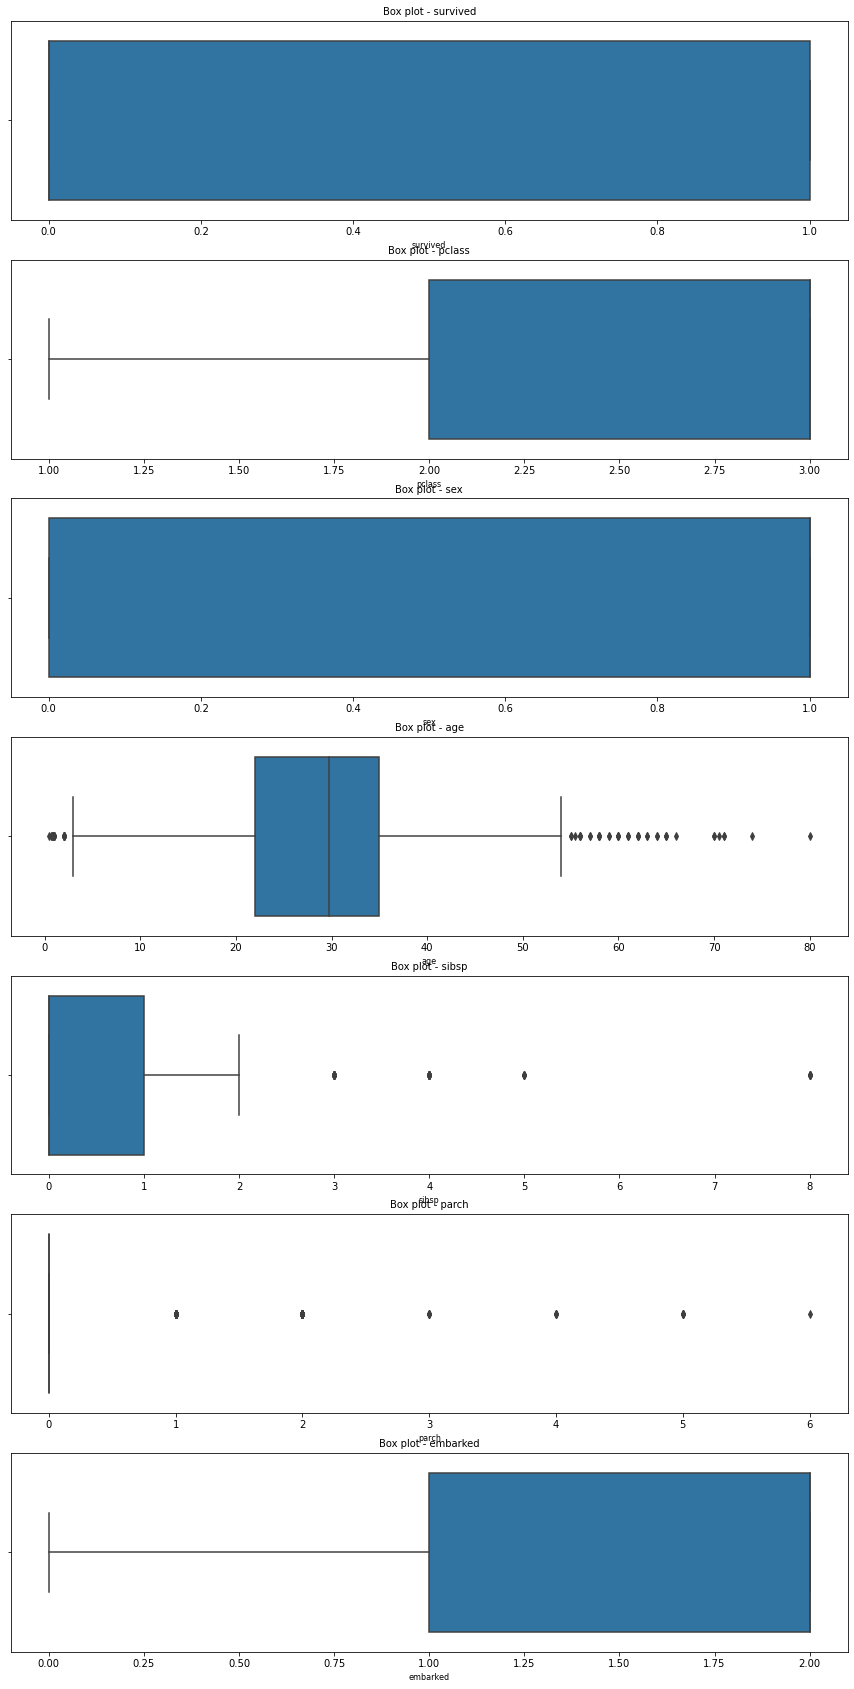

In [24]:
# Checking for Outliers
#
fig, ax = plt.subplots(len(train.columns), figsize= (15,30))

for i, col_val in enumerate(train.columns):
  sns.boxplot(train[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [25]:
# Dealing with outliers
#
#We decided not to remove outliers

In [26]:
# More data cleaning procedures
#decided to create a column and group children and adults. adults being 18 and above
# adults=1
# child=0
# 
def childadult(age):
   if age > 17:
     return 1
   else:
     return 0


train['child_adult'] =  train['age'].apply(childadult)

In [27]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked,child_adult
0,0,3,1,22.0,1,0,2,1
1,1,1,0,38.0,1,0,0,1
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,2,1
4,0,3,1,35.0,0,0,2,1


## 6. Univariate analysis

In [28]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked,child_adult
0,0,3,1,22.0,1,0,2,1
1,1,1,0,38.0,1,0,0,1
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,2,1
4,0,3,1,35.0,0,0,2,1


In [29]:
#statistical descriptionof dataset
train.describe()

,survived,pclass,sex,age,sibsp,parch,embarked,child_adult
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,1.536476,0.873176
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,0.791503,0.332962
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,2.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000,1.000000


In [30]:
#descriptive statistics especilly for the numerical columns such as age.
for i in train.columns:
  print(i)
  print(f'mean:  {train[i].mean()}')
  print(f'median:  {train[i].sort_values(ascending=False).median()}')
  print(f'mode:  {train[i].mode()}')
  print(f'skewness:  {train[i].skew()}')
  print(f'The Standard Deviation: {train[i].std()}')
  print(f'The Variance: {train[i].var()}')
  print(f'Kurtosis:  {train[i].kurt()}, \n')


survived
mean:  0.3838383838383838
median:  0.0
mode:  0    0
dtype: int64
skewness:  0.4785234382949897
The Standard Deviation: 0.4865924542648585
The Variance: 0.2367722165474984
Kurtosis:  -1.775004671066304, 

pclass
mean:  2.308641975308642
median:  3.0
mode:  0    3
dtype: int64
skewness:  -0.6305479068752845
The Standard Deviation: 0.8360712409770513
The Variance: 0.6990151199889065
Kurtosis:  -1.2800149715782825, 

sex
mean:  0.6475869809203143
median:  1.0
mode:  0    1
dtype: int64
skewness:  -0.6189208484871986
The Standard Deviation: 0.47799007089609846
The Variance: 0.22847450787525722
Kurtosis:  -1.6205797015694405, 

age
mean:  29.699117647058763
median:  29.69911764705882
mode:  0    29.699118
dtype: float64
skewness:  0.4344880940129925
The Standard Deviation: 13.002015226002884
The Variance: 169.05239993721085
Kurtosis:  0.9662793026645233, 

sibsp
mean:  0.5230078563411896
median:  0.0
mode:  0    0
dtype: int64
skewness:  3.6953517271630565
The Standard Deviation: 1

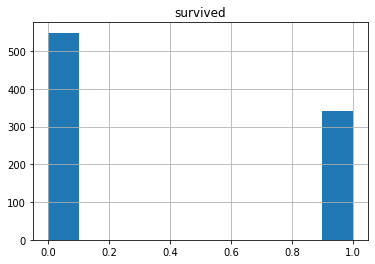

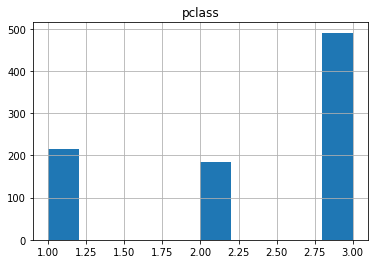

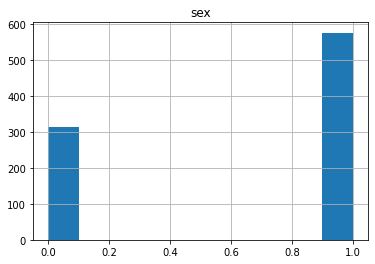

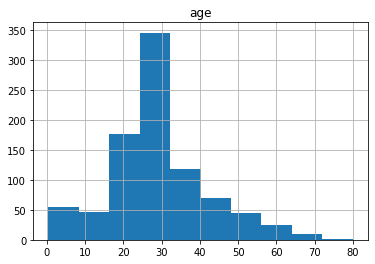

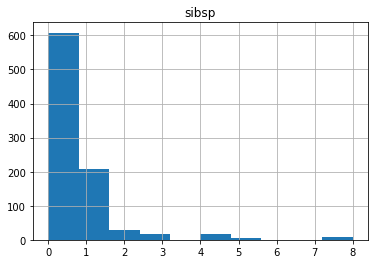

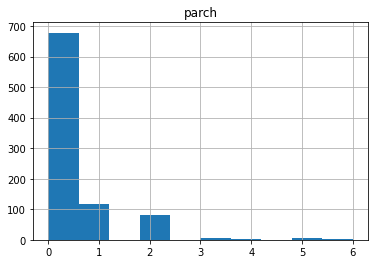

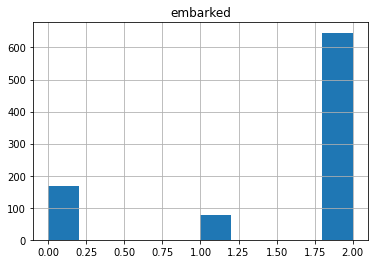

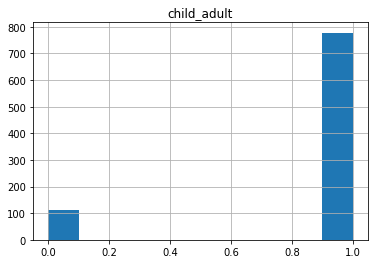

In [31]:
#histogram distribution of dateset
for i in train.columns:
  train.hist(i)

Text(0.5, 1.0, 'Survived comparison to not survived')

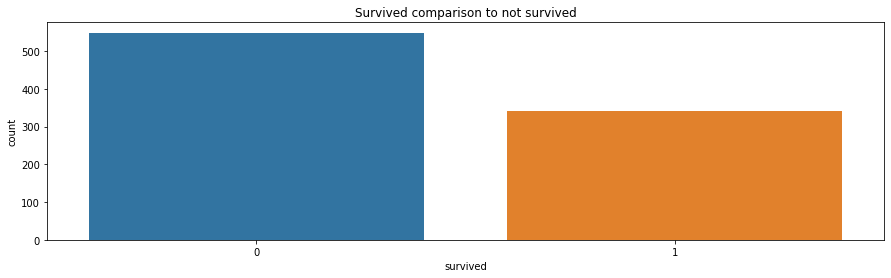

In [32]:
#Survivors distribution
plt.figure(figsize=(15, 4))
sns.countplot(train['survived'], order = train['survived'].value_counts().index);
plt.title('Survived comparison to not survived')

Most people did not survive

Text(0.5, 1.0, 'Adult Child comparison')

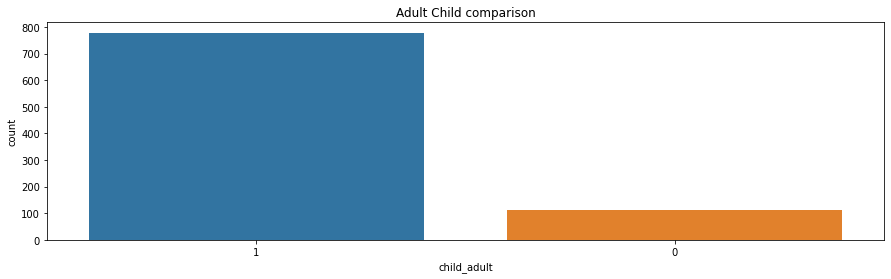

In [33]:
#Survivors distribution
plt.figure(figsize=(15, 4))
sns.countplot(train['child_adult'], order = train['child_adult'].value_counts().index);
plt.title('Adult Child comparison')

Most Victims were adults.

In [34]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked',
       'child_adult'],
      dtype='object')

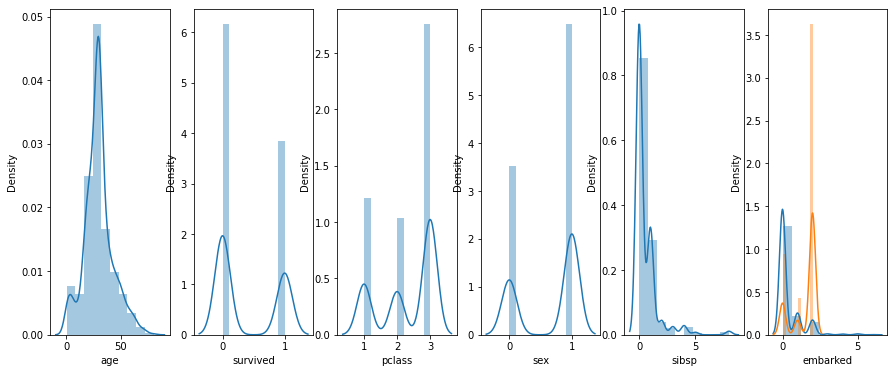

In [35]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize= (15,6))

sns.distplot(train.age, ax=ax1, bins= 10)
sns.distplot(train.survived, ax=ax2, bins= 10)
sns.distplot(train.pclass, ax=ax3, bins= 10)
sns.distplot(train.sex, ax=ax4, bins= 10)
sns.distplot(train.sibsp, ax=ax5, bins= 10)
sns.distplot(train.parch, ax=ax6, bins= 10)
sns.distplot(train.embarked, ax=ax6, bins= 10)

In [36]:
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize = (15,15))
# fig.subplots_adjust(hspace=0.2)
# fig.suptitle('Distributions of vrious features')

# for ax, values, name in zip(axes.flatten(), train.values.T, train.columns):
#     sns.distplot(values, ax=ax, bins=len(np.unique(train.values.T[1]))//2)
#     ax.set(title="Frequency Distribution of {}".format(name), xlabel=name)

## 7. Bivariate analysis

([<matplotlib.axis.XTick at 0x7fb144501650>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

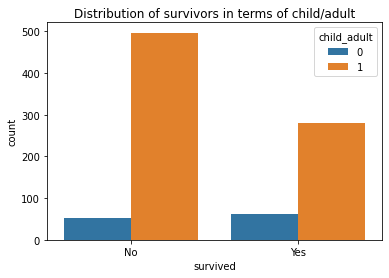

In [37]:
# Distribution of survivors by child/adult
sns.countplot(train['survived'], hue= train['child_adult'])
plt.title('Distribution of survivors in terms of child/adult')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

Adults dominated in both survived and not survived cases

([<matplotlib.axis.XTick at 0x7fb1444447d0>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

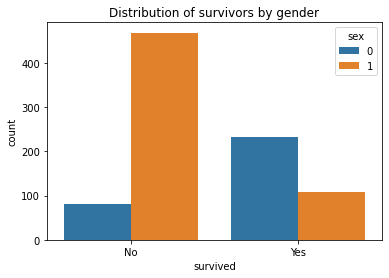

In [38]:
# Distribution of survivors by gender
# male=1
# female=0
sns.countplot(train['survived'], hue= train['sex'])
plt.title('Distribution of survivors by gender')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

More males than females did not survived but more females than males survived

([<matplotlib.axis.XTick at 0x7fb144628210>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

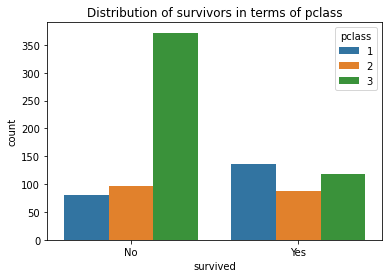

In [39]:
# Distribution of survivors by child/adult
sns.countplot(train['survived'], hue= train['pclass'])
plt.title('Distribution of survivors in terms of pclass')
plt.xticks(ticks=[0,1], labels=['No','Yes'])

Most people who did not survive were from third class.

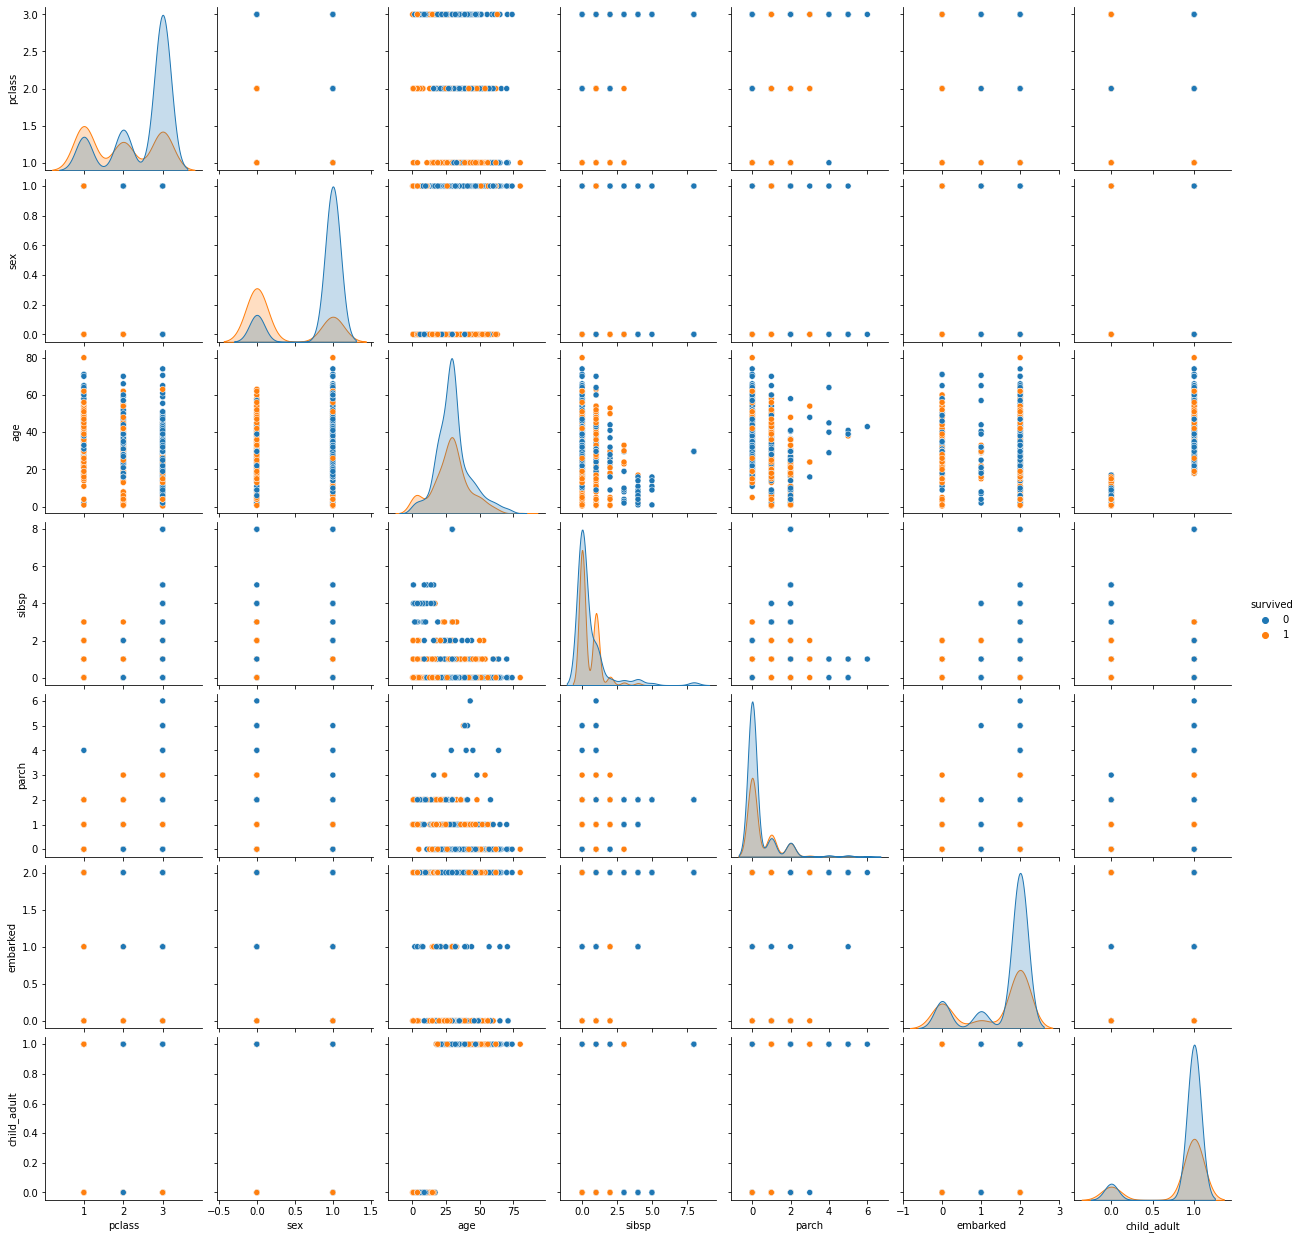

In [40]:
#plotting a pairplot to show correlation and distribution and use the hue parameter 'survived' as its 
# the categorical variable we are trying to predict
sns.pairplot(train, hue="survived")
plt.show()

There is no strong definitive correlation in almost all variables.

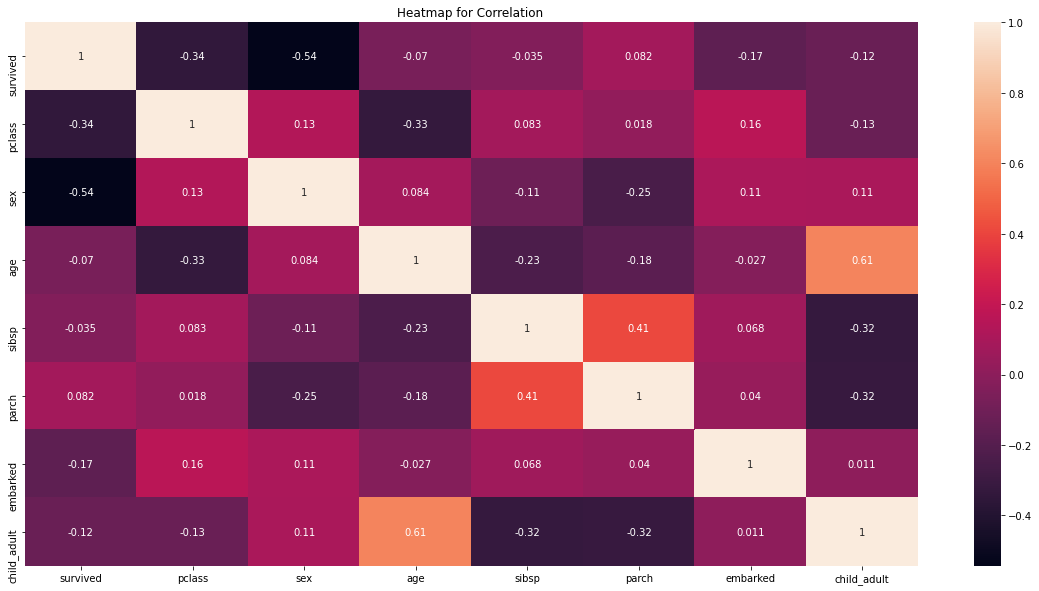

In [41]:
# plotting heatmap
cor = train.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)
plt.title('Heatmap for Correlation ')
plt.show()

Most correlations are either weak positives or weak negatives

## Modelling

In [42]:
train.head()

,survived,pclass,sex,age,sibsp,parch,embarked,child_adult
0,0,3,1,22.0,1,0,2,1
1,1,1,0,38.0,1,0,0,1
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,2,1
4,0,3,1,35.0,0,0,2,1


In [43]:
#Splitting target variable
X = train.drop('survived', axis=1)
y = train['survived']

#splitting 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#data reduction by LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
#getting the coeeficients
dfcoef = pd.DataFrame(lda.coef_[0], index = X.columns.values)
dfcoef.sort_values(0, ascending = False)


,0
parch,-0.106276
embarked,-0.151072
child_adult,-0.289942
sibsp,-0.388136
age,-0.399080
pclass,-0.947601
sex,-1.691920


From coeffficients gathered: we will just use all the variables.

### 80/20 Split

In [44]:
#Splitting target variable
X = train.drop('survived', axis=1)
y = train['survived']

#splitting 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training our algorithm
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)

# Making our prediction

y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.17318435754189945
[[101   9]
 [ 22  47]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



### 70/30 Split

In [45]:
#Splitting target variable
X = train.drop('survived', axis=1)
y = train['survived']

#splitting 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training our algorithm
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)

# Making our prediction

y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.17537313432835822
[[154  14]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.83      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



### 60/40 split

In [46]:
#Splitting target variable
X = train.drop('survived', axis=1)
y = train['survived']

#splitting 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training our algorithm
clf = KNeighborsClassifier(10)
clf.fit(X_train, y_train)

# Making our prediction

y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.1876750700280112
[[201  20]
 [ 47  89]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       221
           1       0.82      0.65      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357



We tried various values of K(6,8,11,10) and decided to use 10 as it provided a higher f1 score. The 80/20 split had the highest accuracy f1 score of 83%. We therefore try it with LDA and see if there will be a diffrence in the score.

### Optimizing by LDA

In [47]:
#Splitting target variable
X = train.drop('survived', axis=1)
y = train['survived']

#splitting 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Capturing our LDA variables
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Training our algorithm
clf = KNeighborsClassifier(11)
clf.fit(X_train, y_train)

# Making our prediction

y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

#Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.21787709497206703
[[92 18]
 [21 48]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       110
           1       0.73      0.70      0.71        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



LDA reduced as we had predicted initially because our coefficients were all negatives. We therefore stick to the model without LDA.

## Challenging the solution.

Our best performing model is the 80/20 split without LDA that gave us a score of 83%. With LDA we had 78%. However to improve the performance of the model we could try optimize by other distance metrics.